In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input,Dense,Conv2D,Flatten,Dropout
from tensorflow.keras.models import Model

In [3]:
#data yukleme
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

#normalizasyon
x_train,x_test =x_train/255.0,x_test/255.0

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
#shape
print("normal boyut:",x_train.shape)
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print("yeni boyut:",x_train.shape)

normal boyut: (60000, 28, 28)
yeni boyut: (60000, 28, 28, 1)


In [5]:
#sınıf sayısı
sınıf = len(set(y_train))
print("sınıf sayısı:",sınıf)

sınıf sayısı: 10


In [6]:
#model olusturma
i=Input(shape=x_train[0].shape)
x=Conv2D(filters=32,kernel_size=(3,3),strides=2,activation='relu')(i)
x=Conv2D(filters=64,kernel_size=(3,3),strides=2,activation='relu')(x)
x=Conv2D(filters=128,kernel_size=(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.15)(x)
x=Dense(256,activation='relu')(x)
x=Dropout(0.15)(x)
x=Dense(256,activation='relu')(x)
x=Dense(sınıf,activation='softmax')(x)

model=Model(i,x)

In [7]:
# Model Compile
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='acc')
result=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,)

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.5272 - acc: 0.8049 - val_loss: 0.3938 - val_acc: 0.8515
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3662 - acc: 0.8625 - val_loss: 0.3552 - val_acc: 0.8656
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.3124 - acc: 0.8832 - val_loss: 0.3301 - val_acc: 0.8768
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2834 - acc: 0.8925 - val_loss: 0.3050 - val_acc: 0.8880
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2563 - acc: 0.9035 - val_loss: 0.2971 - val_acc: 0.8931
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2344 - acc: 0.9121 - val_loss: 0.2909 - val_acc: 0.8925
Epoch 7/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2176 - acc: 0.9186 - val_loss: 0.2992 - val_acc: 0.8919
Epoch 8/10
1875/1875 [==============================] -

In [45]:
tahmin = model.predict(x_test).argmax(axis=1)
print("tahmin: ",tahmin[880])
print("gercek: ",y_test[880])

313/313 [==============================] - 1s 4ms/step
tahmin:  7
gercek:  7


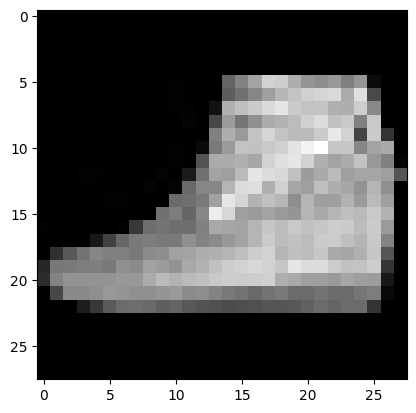

In [44]:
import matplotlib.pyplot as plt
plt.imshow(x_test[250].reshape(28,28),cmap='gray')